In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import feature_extraction as fe
import imp
imp.reload(fe)

C:\Users\USER\AppData\Local\Temp\ipykernel_12944\123357903.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'feature_extraction' from 'C:\\Users\\USER\\Documents\\IF5171\\stock-pred-api\\experiments\\feature_engineering\\feature_extraction.py'>

In [3]:
df = yf.download('TLKM.JK', start='2012-09-18', end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,1880.0,1880.0,1850.0,1880.0,1451.125488,72222500
2012-09-19,1880.0,1910.0,1870.0,1880.0,1451.125488,117850000
2012-09-20,1880.0,1880.0,1850.0,1880.0,1451.125488,56595000
2012-09-21,1880.0,1890.0,1860.0,1880.0,1451.125488,56237500
2012-09-24,1850.0,1880.0,1840.0,1850.0,1427.968994,54650000


In [4]:
df.index = pd.to_datetime(df.index)

## Features Extraction

In [5]:
df2 = fe.generate_TAs_features(df)
df2.head()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          7
7 DAYS STD DEV     7
14 DAYS MA        14
21 DAYS MA        21
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA
Date,,,,,,,,,,
2012-10-17,1950.0,1970.0,1940.0,1950.0,1505.156372,133372500,1935.714286,18.126539,1913.571429,1898.571429
2012-10-18,1930.0,1960.0,1920.0,1930.0,1489.718994,64702500,1940.000000,17.320508,1919.285714,1901.904762
2012-10-19,1930.0,1960.0,1930.0,1930.0,1489.718994,71067500,1940.000000,17.320508,1922.142857,1904.285714
2012-10-22,1910.0,1940.0,1910.0,1910.0,1474.281372,62315000,1940.000000,17.320508,1925.714286,1906.666667
2012-10-23,1930.0,1940.0,1890.0,1930.0,1489.718994,88507500,1934.285714,19.880596,1926.428571,1908.095238


In [6]:
df3 = fe.generate_date_related_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,
2012-10-17,1950.0,1970.0,1940.0,1950.0,1505.156372,133372500,1935.714286,18.126539,1913.571429,1898.571429,2,4,10,2012,291,17,42
2012-10-18,1930.0,1960.0,1920.0,1930.0,1489.718994,64702500,1940.000000,17.320508,1919.285714,1901.904762,3,4,10,2012,292,18,42
2012-10-19,1930.0,1960.0,1930.0,1930.0,1489.718994,71067500,1940.000000,17.320508,1922.142857,1904.285714,4,4,10,2012,293,19,42
2012-10-22,1910.0,1940.0,1910.0,1910.0,1474.281372,62315000,1940.000000,17.320508,1925.714286,1906.666667,0,4,10,2012,296,22,43
2012-10-23,1930.0,1940.0,1890.0,1930.0,1489.718994,88507500,1934.285714,19.880596,1926.428571,1908.095238,1,4,10,2012,297,23,43


In [7]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.head()

,Close,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,
2012-10-17,1950.0,1935.714286,18.126539,1913.571429,1898.571429,2,4,10,2012,291,17,42
2012-10-18,1930.0,1940.000000,17.320508,1919.285714,1901.904762,3,4,10,2012,292,18,42
2012-10-19,1930.0,1940.000000,17.320508,1922.142857,1904.285714,4,4,10,2012,293,19,42
2012-10-22,1910.0,1940.000000,17.320508,1925.714286,1906.666667,0,4,10,2012,296,22,43
2012-10-23,1930.0,1934.285714,19.880596,1926.428571,1908.095238,1,4,10,2012,297,23,43


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2012-10-17 to 2022-09-16
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2459 non-null   float64
 1   7 DAYS MA       2459 non-null   float64
 2   7 DAYS STD DEV  2459 non-null   float64
 3   14 DAYS MA      2459 non-null   float64
 4   21 DAYS MA      2459 non-null   float64
 5   dayofweek       2459 non-null   int64  
 6   quarter         2459 non-null   int64  
 7   month           2459 non-null   int64  
 8   year            2459 non-null   int64  
 9   dayofyear       2459 non-null   int64  
 10  dayofmonth      2459 non-null   int64  
 11  weekofyear      2459 non-null   UInt32 
dtypes: UInt32(1), float64(5), int64(6)
memory usage: 242.5 KB


In [9]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4.head()

,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close_
Date,,,,,,,,,,,,
2012-10-17,1935.714286,18.126539,1913.571429,1898.571429,2,4,10,2012,291,17,42,1950.0
2012-10-18,1940.000000,17.320508,1919.285714,1901.904762,3,4,10,2012,292,18,42,1930.0
2012-10-19,1940.000000,17.320508,1922.142857,1904.285714,4,4,10,2012,293,19,42,1930.0
2012-10-22,1940.000000,17.320508,1925.714286,1906.666667,0,4,10,2012,296,22,43,1910.0
2012-10-23,1934.285714,19.880596,1926.428571,1908.095238,1,4,10,2012,297,23,43,1930.0


In [10]:
df4 = df4.rename(columns={'Close_': 'Close'})
df4.head()

,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,
2012-10-17,1935.714286,18.126539,1913.571429,1898.571429,2,4,10,2012,291,17,42,1950.0
2012-10-18,1940.000000,17.320508,1919.285714,1901.904762,3,4,10,2012,292,18,42,1930.0
2012-10-19,1940.000000,17.320508,1922.142857,1904.285714,4,4,10,2012,293,19,42,1930.0
2012-10-22,1940.000000,17.320508,1925.714286,1906.666667,0,4,10,2012,296,22,43,1910.0
2012-10-23,1934.285714,19.880596,1926.428571,1908.095238,1,4,10,2012,297,23,43,1930.0


## Visualizations

C:\Users\USER\AppData\Local\Temp\ipykernel_12944\1562528874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Close'])


<AxesSubplot: xlabel='Close', ylabel='Density'>

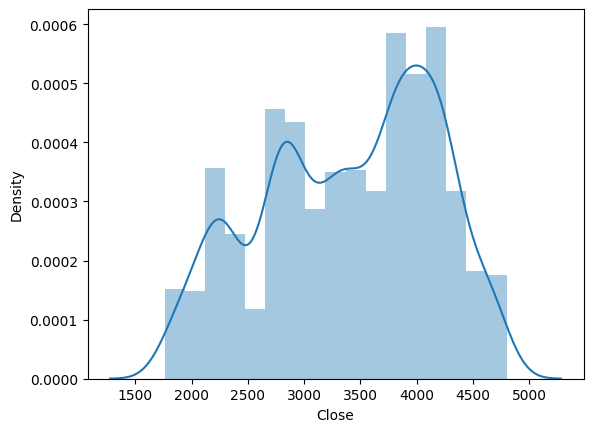

In [11]:
sns.distplot(df4['Close'])

## Standardize Data using StandardScaler

In [12]:
scaled_df = df4.copy()

In [13]:
from sklearn.preprocessing import StandardScaler

features_scaler = StandardScaler()
features = scaled_df.columns[:-1]
scaled_df[features] = features_scaler.fit_transform(scaled_df[features])

In [14]:
close_scaler = StandardScaler()
scaled_df['Close'] = close_scaler.fit_transform(np.array(scaled_df['Close']).reshape(-1,1))

In [15]:
scaled_df.head()

,7 DAYS MA,7 DAYS STD DEV,14 DAYS MA,21 DAYS MA,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,
2012-10-17,-1.901334,-1.101544,-1.927720,-1.944208,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,-1.884821
2012-10-18,-1.895749,-1.125565,-1.920264,-1.939855,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,-1.910838
2012-10-19,-1.895749,-1.125565,-1.916537,-1.936745,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,-1.910838
2012-10-22,-1.895749,-1.125565,-1.911877,-1.933636,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,-1.936855
2012-10-23,-1.903195,-1.049270,-1.910945,-1.931770,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,-1.910838


### Save the scalers

In [16]:
from joblib import dump, load

In [17]:
dump(features_scaler, 'tlkm_features_scaler.bin', compress=True)

['tlkm_features_scaler.bin']

In [18]:
dump(close_scaler, 'tlkm_close_scaler.bin', compress=True)

['tlkm_close_scaler.bin']

In [19]:
test_loaded_sc = load('tlkm_close_scaler.bin')

In [20]:
test_loaded_sc.inverse_transform(np.array(scaled_df['Close']).reshape(-1,1))[0]

array([1950.])

### Save the scaled data as csv

In [21]:
scaled_df.to_csv('../cleaned_data/TLKM.csv')

## EDA

In [22]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [23]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

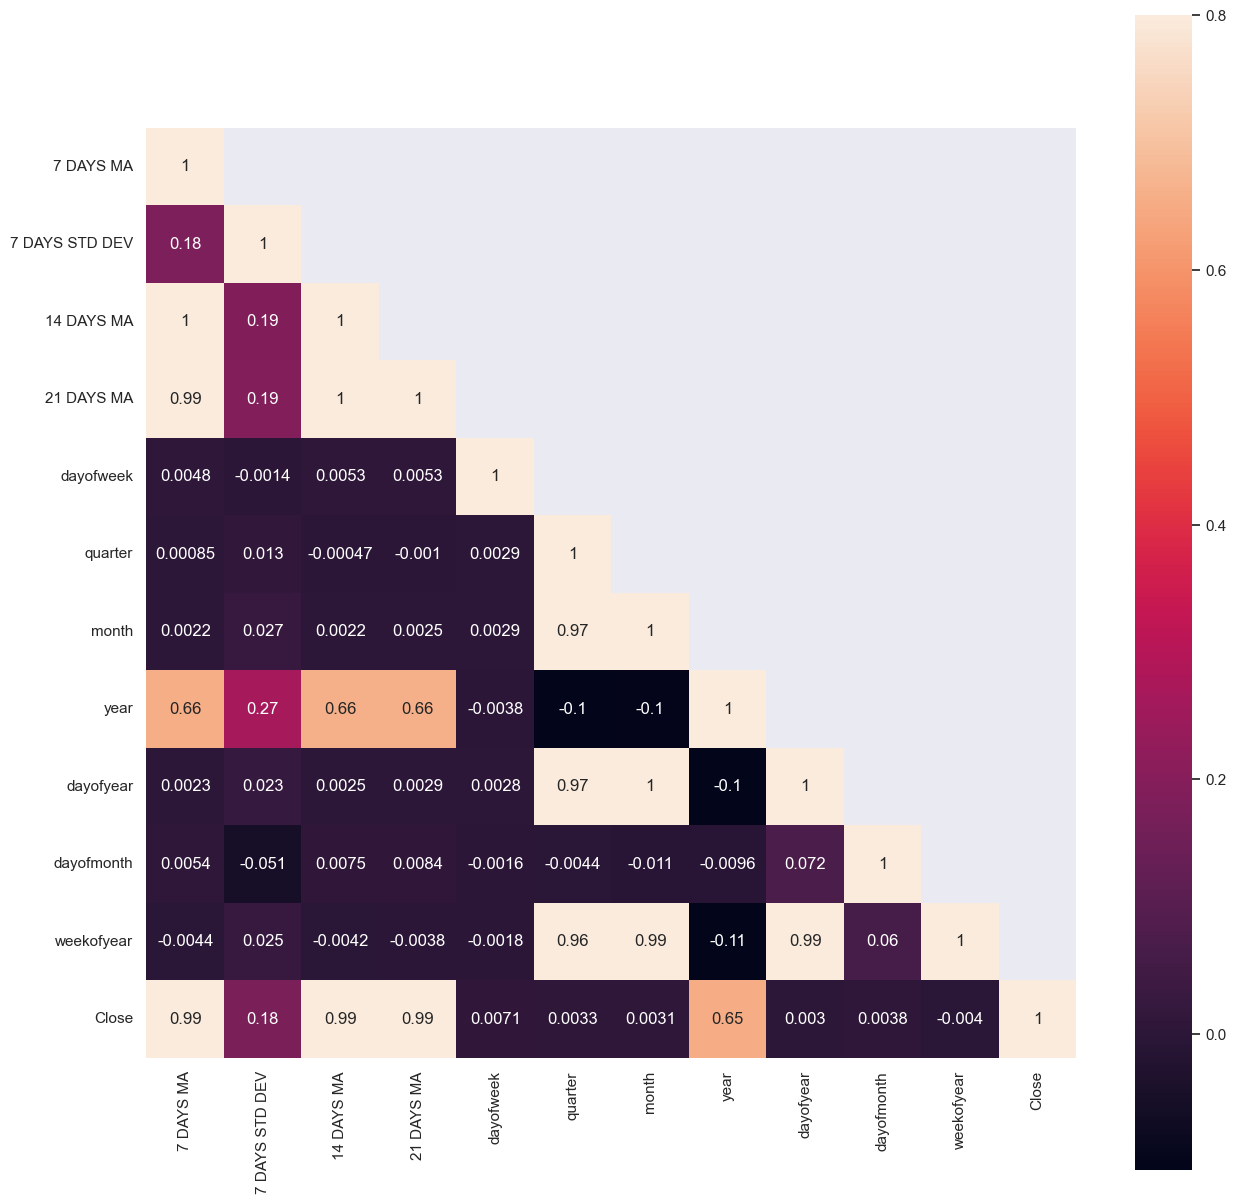

In [24]:
corr_data = scaled_df.corr()
plot_corr_coef(corr_data)

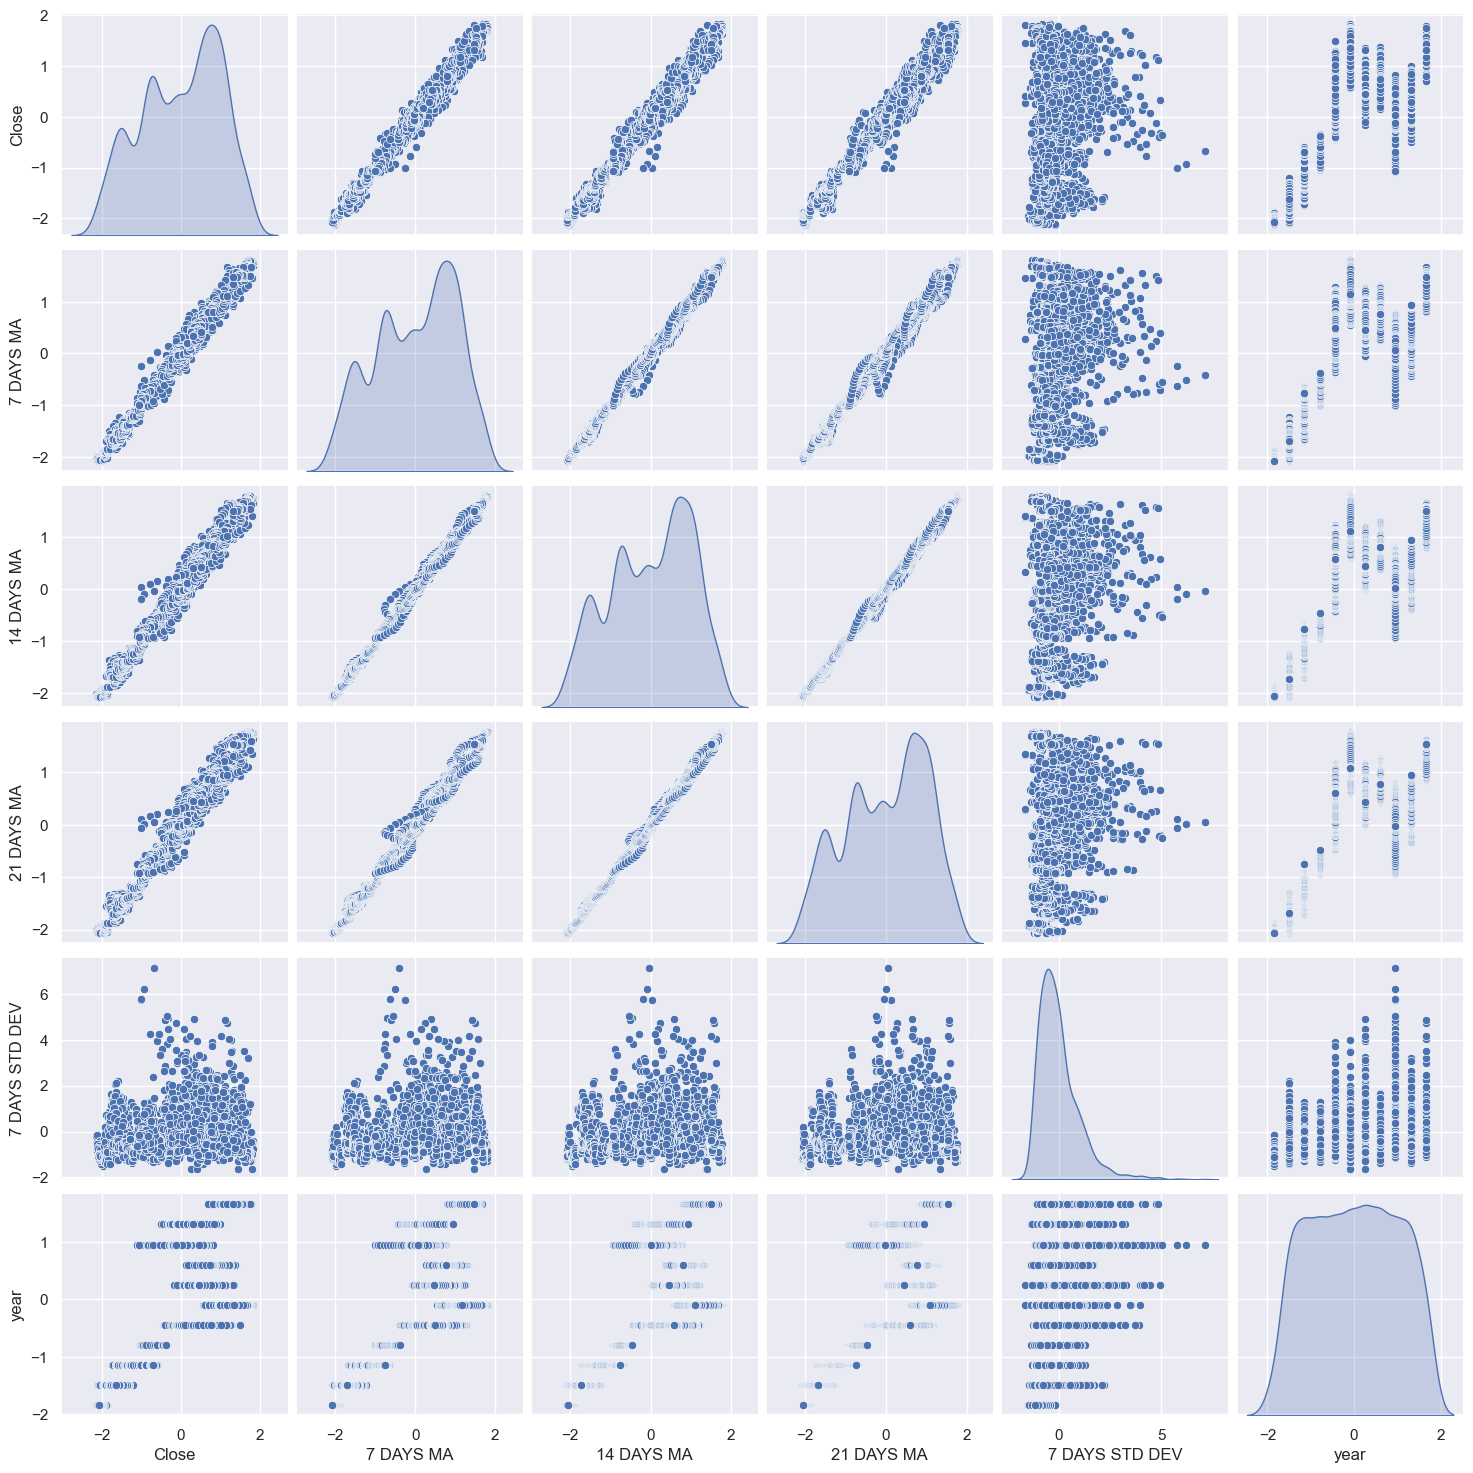

In [25]:
sns.pairplot(scaled_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV', 'year']], diag_kind='kde')